In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
start = pd.Timestamp("2020-02-13 17:23:00")
df_total = None
id = 0
for i in range(1,17):
    df = pd.read_csv(f"../data/glucose/glycemic/Dexcom_0{i:02d}.csv", index_col=0)
    df = df.loc[df['Event Type']=='EGV', ["Timestamp (YYYY-MM-DDThh:mm:ss)", "Glucose Value (mg/dL)"]]
    df = df.rename(columns={"Timestamp (YYYY-MM-DDThh:mm:ss)": 'ds', "Glucose Value (mg/dL)": 'y'})
    # df['ds'] = pd.to_datetime(df['ds'], format=("%Y-%m-%d %H:%M:%S"))
    # df['ds'] = df['ds'].dt.floor('min')
    df['ds'] = pd.date_range(start, freq='5min', periods=len(df))
    df['unique_id'] = id
    df = df.iloc[:1673]
    print(max(df['ds']), len(df))
    if i == 1:
        df_total = df
    else:
        df_total = pd.concat([df_total, df])
    id += 1
df_total

2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673
2020-02-19 12:43:00 1673


,ds,y,unique_id
Index,,,
13,2020-02-13 17:23:00,61.0,0
14,2020-02-13 17:28:00,59.0,0
15,2020-02-13 17:33:00,58.0,0
16,2020-02-13 17:38:00,59.0,0
17,2020-02-13 17:43:00,63.0,0
...,...,...,...
1680,2020-02-19 12:23:00,104.0,15
1681,2020-02-19 12:28:00,103.0,15
1682,2020-02-19 12:33:00,102.0,15


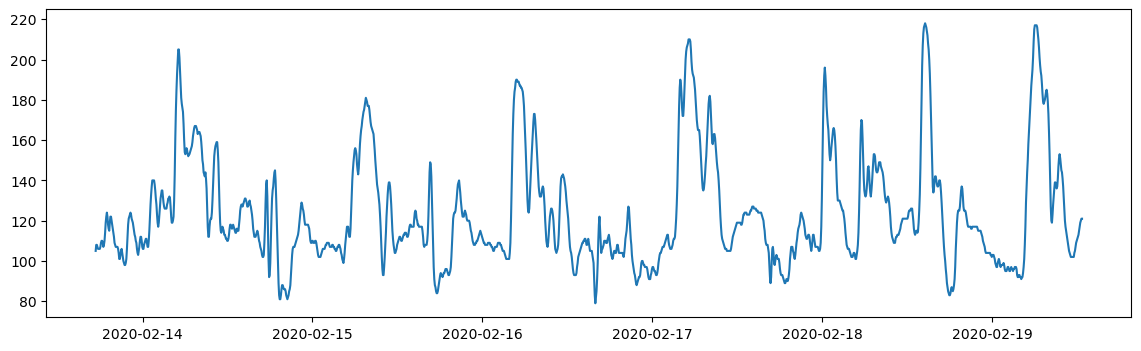

In [40]:
plt.figure(figsize=(14,4))
# plt.plot(df['ds'], df['y'])
id = 5
plt.plot(df_total.loc[df_total['unique_id']==id,'ds'], df_total.loc[df_total['unique_id']==id,'y'])
plt.show()

In [41]:
df_total.to_csv('../data/glucose/y_glucose.csv')